# Data Preprocessing

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [199]:
# import dataset 
data = pd.read_csv("baseball.csv")
data.head(3)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403


In [200]:
# create a copy for data manipulation
df_copy = data
df_copy.head(2)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378


In [201]:
# get rows & column counts for data
data.shape

(1232, 15)

In [202]:
# see if there are no missing years between 1962 - 2012
data["Year"].unique()

array([2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1971, 1970, 1969, 1968, 1967, 1966, 1965,
       1964, 1963, 1962])

In [203]:
# get unique team names to keep track after dropping values
print(sorted(list(data["Team"].unique())))

['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CAL', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET', 'FLA', 'HOU', 'KCA', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'MLN', 'MON', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SEP', 'SFG', 'STL', 'TBD', 'TBR', 'TEX', 'TOR', 'WSA', 'WSN']


## Handling Missing Data

In [204]:
# find missing data values 
data.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [205]:
# drop RankSeason & RankPlayoffs columns (988 missing values)
data = data.drop(data.iloc[:,10:12],axis=1)
data.head(3)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,162,0.315,0.403


In [206]:
# impute missing data for important columns (OOBP & OSLG)
icols = list(data.iloc[:,3:9].columns)
jcols = ["OOBP","OSLG"]

In [207]:
# create dataframe with non-NaN data for OOBP & OSLG
df1 = data[icols]
df1.head(3)

,RS,RA,W,OBP,SLG,BA
0,734,688,81,0.328,0.418,0.259
1,700,600,94,0.320,0.389,0.247
2,712,705,93,0.311,0.417,0.247


In [208]:
# create dataframe isolating OOBP & OSLG
df2 = data[jcols]
df2.head(3)

,OOBP,OSLG
0,0.317,0.415
1,0.306,0.378
2,0.315,0.403


In [209]:
# combine the two dataframes (df1,df2)
df3 = pd.concat([df1,df2],axis=1)
df3.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0.317,0.415
1,700,600,94,0.320,0.389,0.247,0.306,0.378
2,712,705,93,0.311,0.417,0.247,0.315,0.403


In [210]:
# create new dataframe with df3 data (non-NaN)
notnans = df3[jcols].notnull().all(axis=1)
df_notnans = df3[notnans]
df_notnans.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0.317,0.415
1,700,600,94,0.320,0.389,0.247,0.306,0.378
2,712,705,93,0.311,0.417,0.247,0.315,0.403


In [211]:
# split df_notnans into train & test sets for regression model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_notnans[icols],df_notnans[jcols],test_size=0.20,random_state=4)

In [212]:
# use Linear Regression model to predict NaN values for OOBP & OSLG
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

regr_multirf = MultiOutputRegressor(LinearRegression())
regr_multirf.fit(X_train,y_train)
score = regr_multirf.score(X_test,y_test)
print("Prediction score: ",score)

Prediction score:  0.8313085698042717


In [213]:
# create a copy df of df3 with NaNs data
df_nans = df3.loc[~notnans].copy()
df_nans.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
420,787,783,85,0.335,0.415,0.272,NaN,NaN
421,665,812,65,0.314,0.393,0.246,NaN,NaN
422,826,581,106,0.342,0.453,0.272,NaN,NaN


In [214]:
# predict NaN data
df_nans[jcols] = regr_multirf.predict(df_nans[icols])
df_nans.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
420,787,783,85,0.335,0.415,0.272,0.334941,0.426224
421,665,812,65,0.314,0.393,0.246,0.341412,0.434155
422,826,581,106,0.342,0.453,0.272,0.302586,0.370860


In [215]:
# apply prediction to df3
df3 = df3.fillna(df_nans[jcols])
df3.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0.317,0.415
1,700,600,94,0.320,0.389,0.247,0.306,0.378
2,712,705,93,0.311,0.417,0.247,0.315,0.403


In [216]:
# check df3 for NaN values
df3.isnull().sum()

RS      0
RA      0
W       0
OBP     0
SLG     0
BA      0
OOBP    0
OSLG    0
dtype: int64

In [217]:
# add Year and Team columns from original dataframe to df3
df3["Year"] = data["Year"]
df3["Team"] = data["Team"]
df3.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG,Year,Team
0,734,688,81,0.328,0.418,0.259,0.317,0.415,2012,ARI
1,700,600,94,0.320,0.389,0.247,0.306,0.378,2012,ATL
2,712,705,93,0.311,0.417,0.247,0.315,0.403,2012,BAL


In [218]:
# add "Run Differential" for predicting wins
df3["RD"] = data["RS"] - data["RA"]
df3.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG,Year,Team,RD
0,734,688,81,0.328,0.418,0.259,0.317,0.415,2012,ARI,46
1,700,600,94,0.320,0.389,0.247,0.306,0.378,2012,ATL,100
2,712,705,93,0.311,0.417,0.247,0.315,0.403,2012,BAL,7


In [219]:
# check shape after imputing data, no data was dropped
df3.shape

(1232, 11)

## Pairplot (data distribution & correlation visuals)

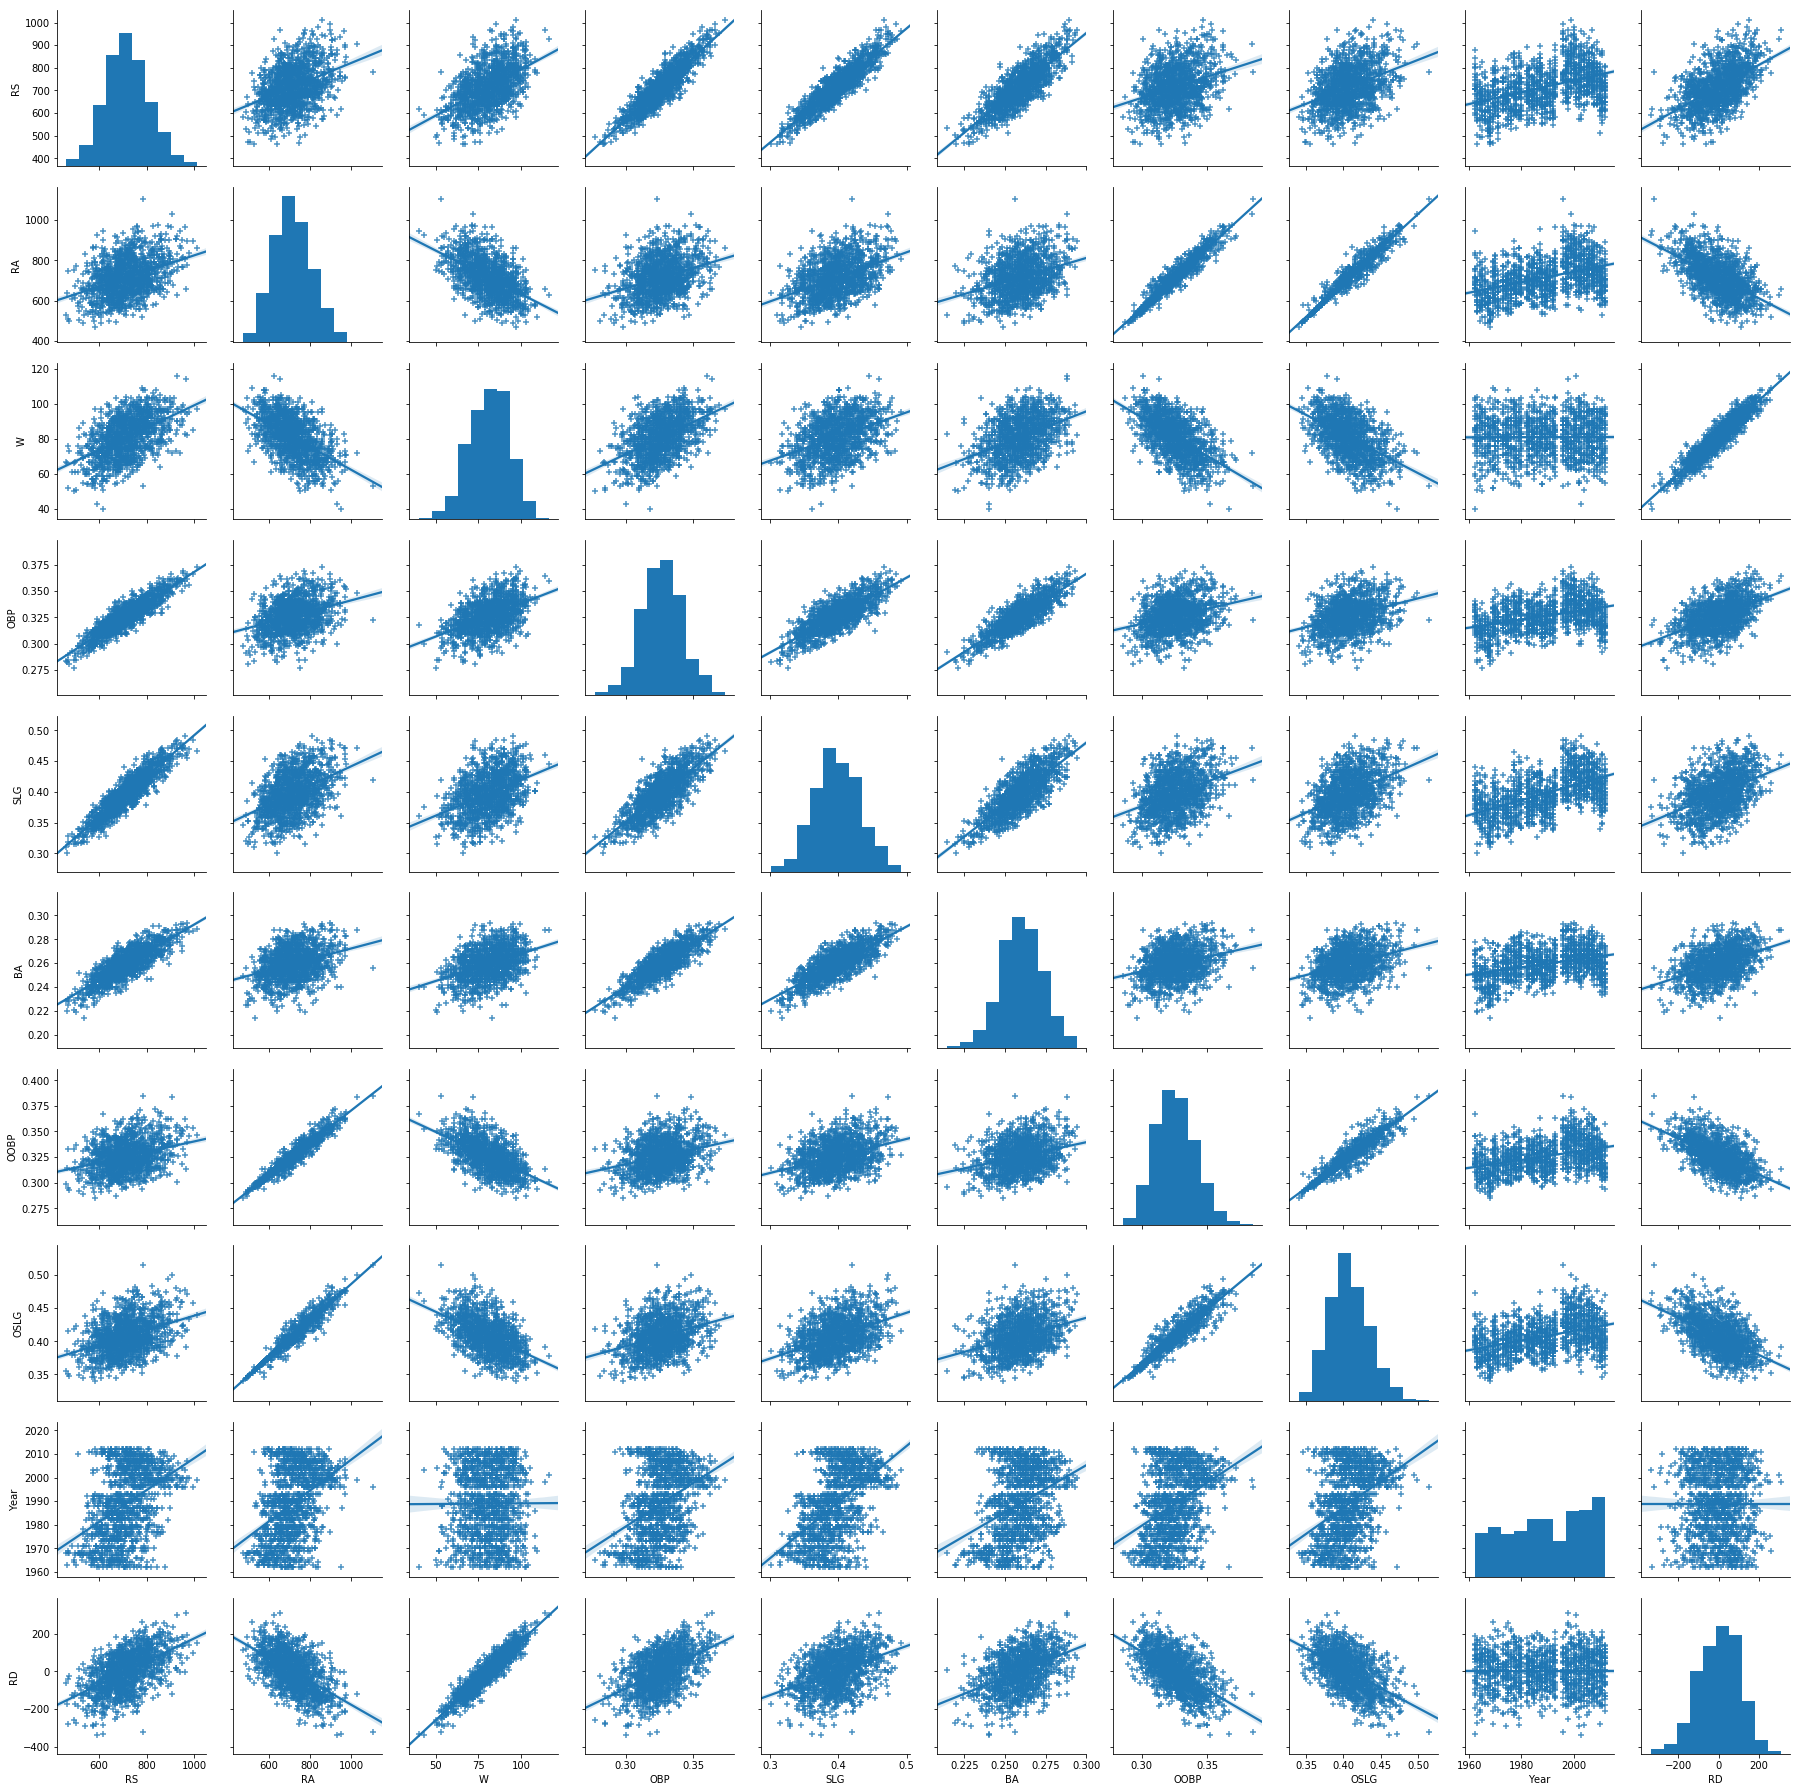

In [220]:
sns.pairplot(df3,markers="+",kind="reg")
plt.show()

Disregarding "Year" column visual, the other columns appear to contain normally distributed data.

## Create new target columns for experimental prediction analysis

In [221]:
# commented out for different analysis, not for Moneyball analysis
#df3["RS_Target"] = df3.groupby("Team")["RS"].shift(1)
#df3["RA_Target"] = df3.groupby("Team")["RA"].shift(1)
#df3["W_Target"] = df3.groupby("Team")["W"].shift(1)
#df3.head(3)

## Remove years 2003 & above for 1962 to 2002 analysis

In [222]:
df3 = df3[df3["Year"]<=2002]

In [223]:
# check if years are between 1962 to 2002
df3["Year"].unique()

array([2002, 2001, 2000, 1999, 1998, 1997, 1996, 1993, 1992, 1991, 1990,
       1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1971, 1970, 1969, 1968, 1967, 1966,
       1965, 1964, 1963, 1962])

In [224]:
df3.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG,Year,Team,RD
300,851,644,99,0.341,0.433,0.282,0.314,0.392,2002,ANA,207
301,819,674,98,0.346,0.423,0.267,0.305,0.397,2002,ARI,145
302,708,565,101,0.331,0.409,0.260,0.313,0.364,2002,ATL,143


In [225]:
# check data for significant loss of data (1232 vs. 932, 300 data loss)
df3.shape

(932, 11)

## Boxplots (checking for outliers)

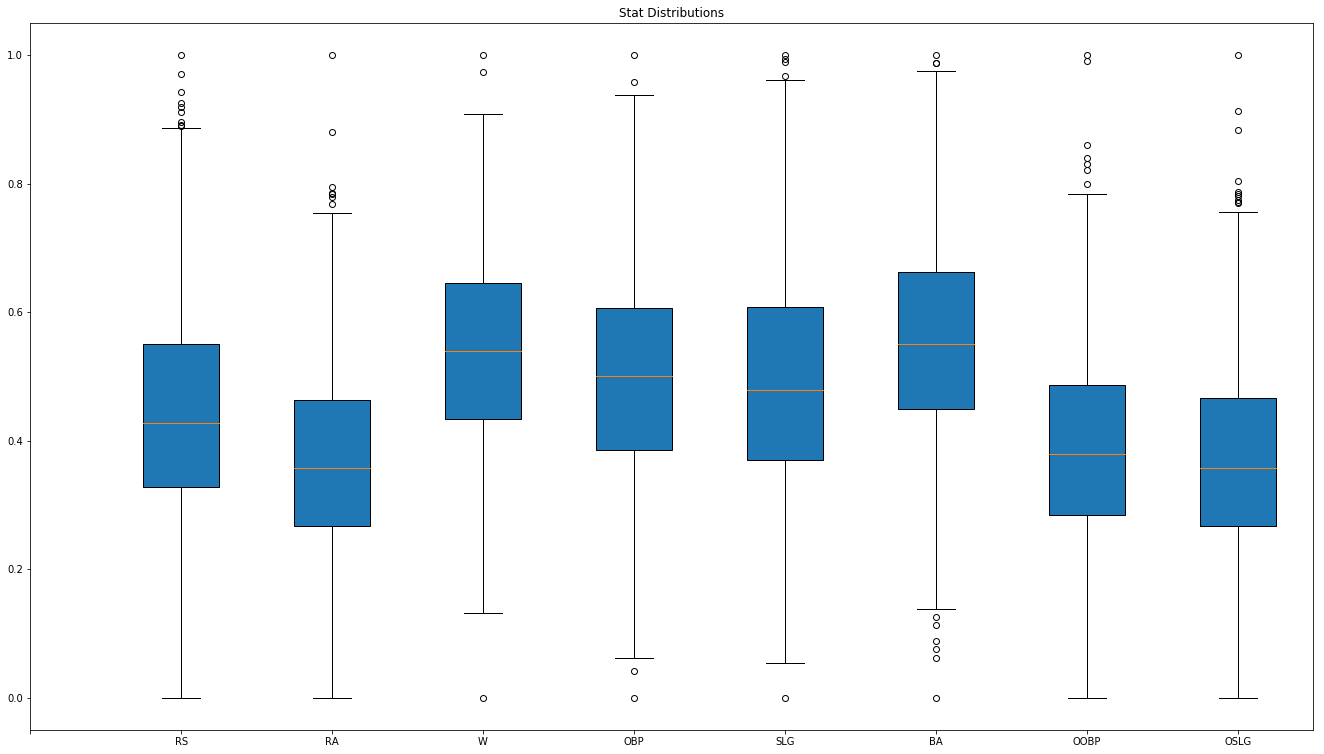

In [226]:
# normalize large data ("RS","RA","W")
# tried using sklearn normalize, got errors w/ shape (how to use this properly?)
plt.rcParams['figure.figsize'] = (23,13)
def normalize(df):
    x = (df-df.min())/(df.max()-df.min())
    return x 

d_set1 = normalize(df3["RS"])
d_set2 = normalize(df3["RA"])
d_set3 = normalize(df3["W"])
d_set4 = normalize(df3["OBP"])
d_set5 = normalize(df3["SLG"])
d_set6 = normalize(df3["BA"])
d_set7 = normalize(df3["OOBP"])
d_set8 = normalize(df3["OSLG"])
data = [d_set1,d_set2,d_set3,d_set4,d_set5,d_set6,d_set7,d_set8]
col_names = ["","RS","RA","W","OBP","SLG","BA","OOBP","OSLG"]
y_pos = np.arange(len(col_names))
plt.boxplot(data,patch_artist=True)
plt.xticks(y_pos,col_names)
plt.title("Stat Distributions")
plt.show()

There appears to be some outliers in the dataset. May need to remove outliers to get more accurate model. 

In [227]:
# use Z-score to detect and remove outliers
from scipy import stats

z = np.abs(stats.zscore(df3.iloc[:,0:8]))

In [228]:
# use Z-score threshold < 3
df3 = df3[(z<=2).all(axis=1)]

In [229]:
# check for significant data loss (932 vs. 784, 148 data loss)
df3.shape

(784, 11)

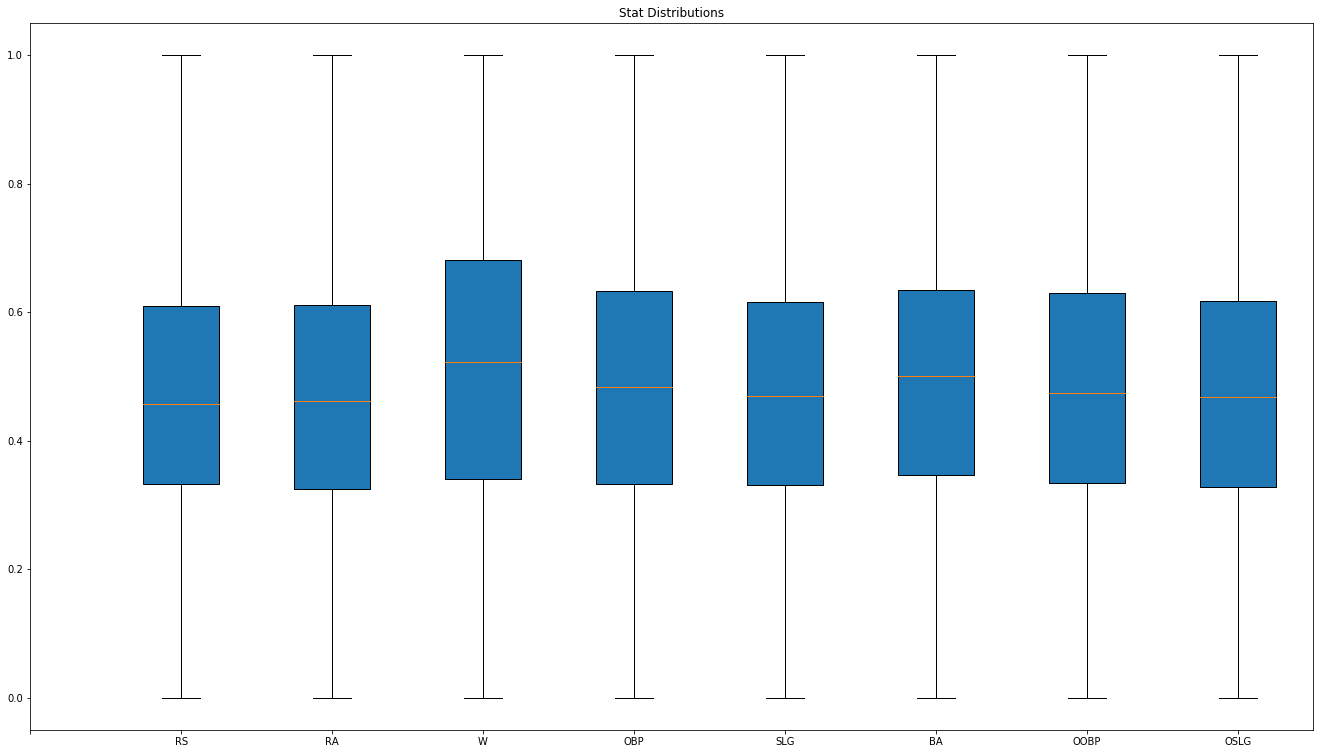

In [230]:
# refit using z-score limits
d_set1 = normalize(df3["RS"])
d_set2 = normalize(df3["RA"])
d_set3 = normalize(df3["W"])
d_set4 = normalize(df3["OBP"])
d_set5 = normalize(df3["SLG"])
d_set6 = normalize(df3["BA"])
d_set7 = normalize(df3["OOBP"])
d_set8 = normalize(df3["OSLG"])
data = [d_set1,d_set2,d_set3,d_set4,d_set5,d_set6,d_set7,d_set8]
col_names = ["","RS","RA","W","OBP","SLG","BA","OOBP","OSLG"]
y_pos = np.arange(len(col_names))
plt.boxplot(data,patch_artist=True)
plt.xticks(y_pos,col_names)
plt.title("Stat Distributions")
plt.show()